In [153]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.offline import plot

In [154]:
def plot_3d(X, Y, Z):
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    ax.plot_surface(X, Y, Z, cmap='viridis')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Plot of f(x, y)')

    # Show the plot
    plt.show()

In [155]:
def plot_3d_interactive(X, Y, Z):
    # Create a 3D surface plot
    fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z)])

    # Set plot layout
    fig.update_layout(
        title='Plot of f(x, y)',
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        )
    )

    # Show the interactive plot
    fig.show()

In [253]:
f = lambda x, y: (x**2 + y -11)**2 + (x + y**2 -7)**2

In [254]:
# Create data for x and y values
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values using the function
Z = f(X, Y)

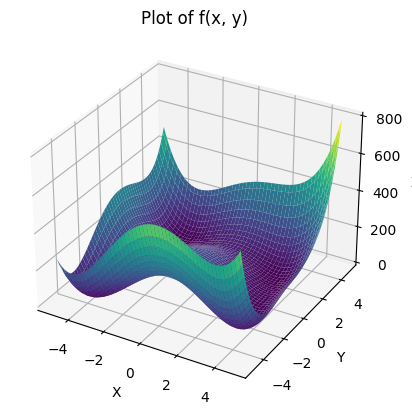

In [158]:
plot_3d(X,Y,Z)

In [159]:
plot_3d_interactive(X,Y,Z)

In [285]:
# Define the range of x and y values to search for roots
x_range = np.arange(-5,5,1)
y_range = np.arange(-5,5,1)

def brute_force(x_range, y_range, threshold = 1e-6):
    # List to store the roots
    roots = []

    # Iterate over the range of values for x and y
    for x in x_range:
        for y in y_range:
            # Check if the function evaluates to approximately zero
            if f(x, y) < threshold:
                roots.append((x, y))
                
    return roots

In [292]:
def print_roots(roots):
    for root in roots:
        print(f"Root: ({root[0]}, {root[1]}) | f(x, y): {f(root[0],root[1])}")

In [288]:
xy1 = brute_force(x_range, y_range)

Root: (3, 2) | f(x, y): 0


In [294]:
x2 = np.arange(-3.9,-3.7,0.0001)
y2 = np.arange(-3.4,-3.2,0.0001)

x3 = np.arange(3.5,3.7,0.0001)
y3 = np.arange(-2,-1.8,0.0001)

x4 = np.arange(-2.9,-2.7,0.0001)
y4 = np.arange(3.0,3.2,0.0001)

xy2 = brute_force(x2, y2, threshold=1e-6)
print_roots(xy2)
xy3 = brute_force(x3, y3, threshold=1e-6)
print_roots(xy3)
xy4 = brute_force(x4, y4, threshold=1e-6)
print_roots(xy4)

Root: (-3.7793999999997454, -3.2832999999997536) | f(x, y): 7.526382380106759e-07
Root: (-3.7793999999997454, -3.2831999999997534) | f(x, y): 4.41379224963466e-07
Root: (-3.779299999999745, -3.2832999999997536) | f(x, y): 6.125901107755008e-07
Root: (-3.779299999999745, -3.2831999999997534) | f(x, y): 1.8827097728477278e-08
Root: (-3.779299999999745, -3.283099999999753) | f(x, y): 3.0742035368564897e-07
Root: (-3.779199999999745, -3.2831999999997534) | f(x, y): 7.589199894988696e-07
Root: (-3.779199999999745, -3.283099999999753) | f(x, y): 7.650172454557937e-07
Root: (-3.7793999999997454, -3.2832999999997536) | f(x, y): 7.526382380106759e-07
Root: (-3.7793999999997454, -3.2831999999997534) | f(x, y): 4.41379224963466e-07
Root: (-3.779299999999745, -3.2832999999997536) | f(x, y): 6.125901107755008e-07
Root: (-3.779299999999745, -3.2831999999997534) | f(x, y): 1.8827097728477278e-08
Root: (-3.779299999999745, -3.283099999999753) | f(x, y): 3.0742035368564897e-07
Root: (-3.779199999999745

In [295]:
def distance(root1, root2):
    # Calculate Euclidean distance between two roots
    return np.sqrt((root1[0] - root2[0])**2 + (root1[1] - root2[1])**2)

def cluster_roots(roots, threshold=0.1):
    # Cluster closely located roots into a single representative
    clustered_roots = []
    
    # Continue clustering until all roots have been processed
    while roots:
        # Select the first root as the current root
        current_root = roots[0]
        cluster = [current_root]
        i = 1
        
        # Check distances between the current root and the rest of the roots
        while i < len(roots):
            if distance(current_root, roots[i]) < threshold:
                cluster.append(roots[i])
            i += 1
        
        # Calculate the centroid of the cluster
        centroid = np.mean(cluster, axis=0)
        clustered_roots.append(tuple(centroid))
        
        # Remove the roots in the cluster from the list of remaining roots
        roots = [root for root in roots if root not in cluster]
    
    return clustered_roots

In [296]:
print_roots(cluster_roots(xy1))
print_roots(cluster_roots(xy2))
print_roots(cluster_roots(xy3))
print_roots(cluster_roots(xy4))

Root: (3.0, 2.0) | f(x, y): 0.0
Root: (-3.7792999999997448, -3.283199999999753) | f(x, y): 1.8827097728075926e-08
Root: (3.58441818181836, -1.8481090909091078) | f(x, y): 8.634011759178753e-09
Root: (-2.8050999999998, 3.1313000000002766) | f(x, y): 1.663101615948196e-08


<h1>Heuristic Method</h1>

In [174]:
import numpy as np

def divide_and_conquer(f, x_min, x_max, y_min, y_max, threshold=1e-6, flatness=0.05, iteration_count=0):
    # List to store the roots
    roots = []

    # Calculate the minimum and maximum f(x, y) values for the current plane
    f_min = f(x_min, y_min)  # Calculate the value of f(x, y) at the bottom-left corner of the plane
    f_max = f(x_max, y_max)  # Calculate the value of f(x, y) at the top-right corner of the plane

    # Check if the difference between the minimum and maximum values is smaller than flatness percentage
    if abs(f_max - f_min) < flatness * abs(f_max):
        # Terminate the plane, assume it's flat and not approaching a solution
        return [], iteration_count

    # Divide the current plane into four smaller planes
    x_mid = (x_min + x_max) / 2  # Calculate the x-coordinate for the middle point of the current plane
    y_mid = (y_min + y_max) / 2  # Calculate the y-coordinate for the middle point of the current plane

    # Check if the function value at the middle point is below the threshold
    if f(x_mid, y_mid) < threshold:
        roots.append((x_mid, y_mid))  # Add the coordinates of the root to the roots list
        return roots, iteration_count

    # Recursively apply the divide and conquer approach to each smaller plane
    roots_left_top, iteration_count = divide_and_conquer(f, x_min, x_mid, y_min, y_mid, threshold=threshold, flatness=flatness, iteration_count=iteration_count + 1)
    roots_right_top, iteration_count = divide_and_conquer(f, x_mid, x_max, y_min, y_mid, threshold=threshold, flatness=flatness, iteration_count=iteration_count + 1)
    roots_left_bottom, iteration_count = divide_and_conquer(f, x_min, x_mid, y_mid, y_max, threshold=threshold, flatness=flatness, iteration_count=iteration_count + 1)
    roots_right_bottom, iteration_count = divide_and_conquer(f, x_mid, x_max, y_mid, y_max, threshold=threshold, flatness=flatness, iteration_count=iteration_count + 1)

    roots.extend(roots_left_top)
    roots.extend(roots_right_top)
    roots.extend(roots_left_bottom)
    roots.extend(roots_right_bottom)

    return roots, iteration_count


In [166]:
# Define the range of x and y values to search for roots
x_min = -5
x_max = 5
y_min = -5
y_max = 5

In [259]:
roots_default_parameter, default_iteration = divide_and_conquer(f, x_min, x_max, y_min, y_max)

In [260]:
roots_speed_parameter, speed_iteration = divide_and_conquer(f, x_min, x_max, y_min, y_max, flatness = 0.06)

In [264]:
roots_accuracy_parameter, accuracy_iteration = divide_and_conquer(f, x_min, x_max, y_min, y_max, threshold=1e-17, flatness = 0.015)

In [196]:
print(f'Speed config iteration\t\t: {speed_iteration}')
print(f'Default config iteration\t: {default_iteration}')
print(f'Accuracy config iteration\t: {accuracy_iteration}')

Speed config iteration		: 456548
Default config iteration	: 1196760
Accuracy config iteration	: 31271064


In [197]:
flatness_values = [0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005]

for flatness in flatness_values:
    _, iteration = divide_and_conquer(f, x_min, x_max, y_min, y_max, flatness=flatness)
    print(f"iteration of flatness({flatness}) = {iteration}")

iteration of flatness(0.05) = 1196760
iteration of flatness(0.04) = 1876540
iteration of flatness(0.03) = 3326960
iteration of flatness(0.02) = 7594196
iteration of flatness(0.01) = 30389696
iteration of flatness(0.009) = 37446904
iteration of flatness(0.008) = 47368132
iteration of flatness(0.007) = 61846016
iteration of flatness(0.006) = 84153268
iteration of flatness(0.005) = 121598068


In [198]:
threshold_values = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]

for threshold in threshold_values:
    _, iteration = divide_and_conquer(f, x_min, x_max, y_min, y_max, threshold=threshold)
    print(f"iteration of threshold({threshold}) = {iteration}")

iteration of threshold(0.0001) = 854064
iteration of threshold(1e-05) = 1017308
iteration of threshold(1e-06) = 1196760
iteration of threshold(1e-07) = 1353268
iteration of threshold(1e-08) = 1530260
iteration of threshold(1e-09) = 1654568
iteration of threshold(1e-10) = 1799596
iteration of threshold(1e-11) = 1862784
iteration of threshold(1e-12) = 2007188
iteration of threshold(1e-13) = 2134684


In [279]:
# Cluster closely located roots
clustered_roots_default_parameter = cluster_roots(roots_default_parameter)
clustered_roots_speed_parameter = cluster_roots(roots_speed_parameter)
clustered_roots_accuracy_parameter = cluster_roots(roots_accuracy_parameter)

# Print the roots
for root in clustered_roots_default_parameter:
    print(f"Root: ({root[0]}, {root[1]})\nf(x, y) = {f(root[0], root[1])}")
print('\n')

for root in clustered_roots_speed_parameter:
    print(f"Root: ({root[0]}, {root[1]})\nf(x, y) = {f(root[0], root[1])}")
print('\n')
for root in clustered_roots_accuracy_parameter:
    print(f"Root: ({root[0]}, {root[1]})\nf(x, y) = {f(root[0], root[1])}")

Root: (-3.779285430908203, -3.2831459045410156)
f(x, y) = 7.860170230173813e-08
Root: (3.584442138671875, -1.84814453125)
f(x, y) = 1.3002763922000116e-08
Root: (-2.805189244887408, 3.1313189338235294)
f(x, y) = 1.6549823372393433e-07
Root: (2.9998779296875, 2.0001220703125)
f(x, y) = 5.066322050772953e-07


Root: (-3.779285430908203, -3.2831459045410156)
f(x, y) = 7.860170230173813e-08
Root: (3.584442138671875, -1.84814453125)
f(x, y) = 1.3002763922000116e-08
Root: (2.9998779296875, 2.0001220703125)
f(x, y) = 5.066322050772953e-07


Root: (-3.7793102534487844, -3.283185991458595)
f(x, y) = 1.2589611999810263e-18
Root: (3.5844283401780648, -1.8481265269138465)
f(x, y) = 1.2012433460622674e-18
Root: (-2.8051180870758685, 3.1313125184100463)
f(x, y) = 1.4895575101341325e-18
Root: (3.0000000004656613, 1.9999999995343387)
f(x, y) = 7.37257477290143e-18


In [278]:
import pandas as pd

# Cluster closely located roots
clustered_roots_default_parameter = cluster_roots(roots_default_parameter)
clustered_roots_speed_parameter = cluster_roots(roots_speed_parameter)
clustered_roots_accuracy_parameter = cluster_roots(roots_accuracy_parameter)

# Create a DataFrame to store the roots
roots_df = pd.DataFrame(columns=['Parameter', 'Root', 'f(x, y)'])

for root in clustered_roots_speed_parameter:
    x, y = root[0], root[1]
    roots_df = roots_df.append({'Parameter': 'Speed', 'Root': f'({x}, {y})', 'f(x, y)': fxy(x, y)}, ignore_index=True)

# Populate the DataFrame with roots and function values
for root in clustered_roots_default_parameter:
    x, y = root[0], root[1]
    roots_df = roots_df.append({'Parameter': 'Balanced', 'Root': f'({x}, {y})', 'f(x, y)': fxy(x, y)}, ignore_index=True)

for root in clustered_roots_accuracy_parameter:
    x, y = root[0], root[1]
    roots_df = roots_df.append({'Parameter': 'Accuracy', 'Root': f'({x}, {y})', 'f(x, y)': fxy(x, y)}, ignore_index=True)

# Display the DataFrame
print(roots_df)

   Parameter                                       Root       f(x, y)
0      Speed  (-3.779285430908203, -3.2831459045410156)  7.860170e-08
1      Speed        (3.584442138671875, -1.84814453125)  1.300276e-08
2      Speed         (2.9998779296875, 2.0001220703125)  5.066322e-07
3   Balanced  (-3.779285430908203, -3.2831459045410156)  7.860170e-08
4   Balanced        (3.584442138671875, -1.84814453125)  1.300276e-08
5   Balanced   (-2.805189244887408, 3.1313189338235294)  1.654982e-07
6   Balanced         (2.9998779296875, 2.0001220703125)  5.066322e-07
7   Accuracy  (-3.7793102534487844, -3.283185991458595)  1.258961e-18
8   Accuracy  (3.5844283401780648, -1.8481265269138465)  1.201243e-18
9   Accuracy  (-2.8051180870758685, 3.1313125184100463)  1.489558e-18
10  Accuracy   (3.0000000004656613, 1.9999999995343387)  7.372575e-18


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8456\4037361475.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8456\4037361475.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8456\4037361475.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8456\4037361475.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8456\4037361475.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
for root in clustered_roots:
    print(fxy(root[0],root[1]))

8.094479073224889e-10
6.519558908769665e-10
3.290396207360368e-11
8.544588081654204e-10


In [ ]:
x_range = np.arange(3.5, 3.65, 0.0001)
y_range = np.arange(-1.9, -1.8, 0.0001)

In [ ]:
brute_force(x_range, y_range)

Root: (3.584400000000178, -1.8481000000000056)


In [ ]:
print(f'Root 1 Targeted Brute force :  {fxy(2.9999999999999716, 1.9999999999999751)} ')
print(f'Root 2 Targeted Brute force :  {fxy(3.584400000000178, -1.8481000000000056)} ')

print(f'\nRoot 1 Gradient Descent Epsilon 1e-6 w/ 1k iteration\t:  {fxy(2.9999999999999716, 1.9999999999999751)} ')
print(f'Root 2 Gradient Descent Epsilon 1e-6 w/ 1k iteration\t:  {fxy(3.5844281073640647, -1.8481239744954467)} ')

print(f'\nRoot 1 Gradient Descent Epsilon 1e-12 w/ 1k iteration\t:  {fxy(2.9999999999999716, 1.9999999999999751)} ')
print(f'Root 2 Gradient Descent Epsilon 1e-12 w/ 1k iteration\t:  {fxy(3.5844283403301804, -1.848126526960993)} ')

Root 1 Targeted Brute force :  5.453868754335987e-26 
Root 2 Targeted Brute force :  4.717612120083209e-08 

Root 1 Gradient Descent Epsilon 1e-6 w/ 1k iteration	:  5.453868754335987e-26 
Root 2 Gradient Descent Epsilon 1e-6 w/ 1k iteration	:  9.423972725468236e-11 

Root 1 Gradient Descent Epsilon 1e-12 w/ 1k iteration	:  5.453868754335987e-26 
Root 2 Gradient Descent Epsilon 1e-12 w/ 1k iteration	:  1.6825734154316554e-22 


<h1>Numerical Method</h1>

In [ ]:
def gradient_descent(f, df_dx, df_dy, x0, y0, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):
    x = x0
    y = y0
    iteration = 0
    
    while iteration < max_iterations:
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)
        
        new_x = x - learning_rate * gradient_x
        new_y = y - learning_rate * gradient_y
        
        if abs(new_x - x) < epsilon and abs(new_y - y) < epsilon:
            break
        
        x = new_x
        y = new_y
        
        iteration += 1
    
    return x, y

# Define the function and its partial derivatives
f = lambda x, y: (x**2 + y - 11)**2 + (x + y**2 - 7)**2
df_dx = lambda x, y: 2*(x**2 + y - 11)*(2*x) + 2*(x + y**2 - 7)
df_dy = lambda x, y: 2*(x**2 + y - 11) + 2*(y**2 + x - 7)*(2*y)

# Perform gradient descent to find the critical point
approx_root = gradient_descent(f, df_dx, df_dy, -2.8, -3.1)

print("Approximate critical point:", approx_root)

Approximate critical point: (-3.779309958342435, -3.2831851510964056)


In [ ]:
x_range = np.arange(-2.8, -2.81, 0.000001)
y_range = np.arange(-3, -3.1, 0.000001)
brute_force(x_range, y_range)